In [37]:
#Assignment 2
#Anjali Kshirsagar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from keras.datasets import imdb
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [23]:
# Here is a list of maximum indexes in every review 
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [24]:
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [25]:
# Vectorize input data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all zero matrix of sh
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1 # Sets specific indices of results
    return results
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [26]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [27]:
X_train.shape

(25000, 10000)

In [28]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [29]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss = losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [31]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:
# Train the model
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 508ms/step - binary_accuracy: 0.7036 - loss: 0.6007 - val_binary_accuracy: 0.8582 - val_loss: 0.4127
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - binary_accuracy: 0.8840 - loss: 0.3612 - val_binary_accuracy: 0.8829 - val_loss: 0.3216
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - binary_accuracy: 0.9136 - loss: 0.2654 - val_binary_accuracy: 0.8807 - val_loss: 0.3000
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - binary_accuracy: 0.9324 - loss: 0.2128 - val_binary_accuracy: 0.8819 - val_loss: 0.2944
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - binary_accuracy: 0.9467 - loss: 0.1705 - val_binary_accuracy: 0.8880 - val_loss: 0.2766
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - binary_accuracy: 0.9553 - loss: 0.1463 - val_binary_accuracy: 0.8890 - val_loss: 0.2837
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - binary_accuracy: 0.9645 - loss: 0.1225 - val_binary_accuracy: 0.8832 - val_loss: 0.3106
Epoch 8/2

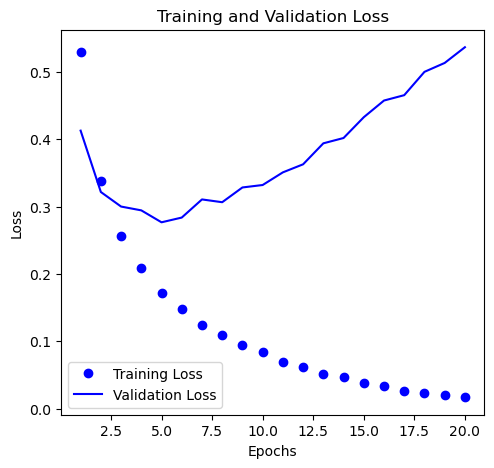

In [33]:
#Plot training and validation loss
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

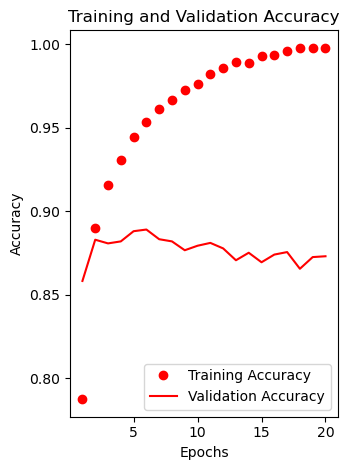

In [34]:
#Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['binary_accuracy'], 'ro', label='Training Accuracy')
plt.plot(epochs, history_dict['val_binary_accuracy'], 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
#Evaluate on test data
results = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - binary_accuracy: 0.8583 - loss: 0.5933

Test Loss: 0.5785, Test Accuracy: 0.8606


In [38]:
# Predict on test data
predictions = model.predict(X_test)
y_pred = (predictions > 0.5).astype("int").flatten()

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error on Test Set: {mae:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step

Mean Absolute Error on Test Set: 0.1394
